In [3]:
import pandas as pd
import numpy as np

from tqdm.auto import tqdm
from scipy.stats import norm 

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
groups = pd.read_csv('groups.csv', sep=';')
groups_add = pd.read_csv('groups_add.csv', sep=',')
active_studs = pd.read_csv('active_studs.csv', sep=';')
checks = pd.read_csv('checks.csv', sep=';')

In [5]:
print(groups.head(), '\n')
print(groups.info(), '\n')
print('Уникальных ID в датасете:', groups.id.nunique())

     id grp
0  1489   B
1  1627   A
2  1768   B
3  1783   B
4  1794   A 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None 

Уникальных ID в датасете: 74484


In [6]:
print(groups_add.head(),                              '\n')
print(groups_add.info(),                              '\n')
print('Уникальных ID в датасете:', groups_add.id.nunique())

        id grp
0  5694584   B
1  5694830   B
2  5695057   B
3  5698872   B
4  5699067   B 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None 

Уникальных ID в датасете: 92


In [7]:
print(active_studs.head(),                                      '\n')
print(active_studs.info(),                                      '\n')
print('Уникальных ID в датасете:', active_studs.student_id.nunique())

   student_id
0      581585
1     5723133
2     3276743
3     4238589
4     4475369 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
None 

Уникальных ID в датасете: 8341


In [8]:
print('Уникальных ID в датасете:', active_studs.student_id.nunique())
print(checks.head(), '\n')
print(checks.info(), '\n')
print('Уникальных ID в датасете:', checks.student_id.nunique())

Уникальных ID в датасете: 8341
   student_id    rev
0        1627  990.0
1        3185  690.0
2       25973  690.0
3       26280  690.0
4      100300  990.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None 

Уникальных ID в датасете: 541


groups_add

In [9]:
print('Количество учтенных ID в active_studs:', groups_add.query('id in @active_studs.student_id').shape[0], 
      '\nКоличество учтенных ID в checks:',     groups_add.query('id in @checks.student_id').shape[0])

Количество учтенных ID в active_studs: 13 
Количество учтенных ID в checks: 1


Соединим датафрейм `groups` c датафреймом `groups_add`, т.к. второй является дополнением первого:

In [10]:
groups_total = pd.concat([groups, groups_add])
print('Общее кол-во строк до соединения:', groups_add.id.count() + groups.id.count(), 
      '\nОбщее кол-во строк до соединения после соединения:', pd.concat([groups, groups_add]).id.count(),
      '\nВсе верно' if groups_add.id.count() + groups.id.count() == groups_total.id.count() else '\nНеверное количество')

Общее кол-во строк до соединения: 74576 
Общее кол-во строк до соединения после соединения: 74576 
Все верно


In [11]:
print('Распределение всех пользователей по группам: \nГруппа A:', 
      groups_total.grp.value_counts()[1], '\nГруппа B:',
      groups_total.grp.value_counts()[0], '\nВсего:   ',
      groups_total.grp.value_counts()[1] +
      groups_total.grp.value_counts()[0])

Распределение всех пользователей по группам: 
Группа A: 14693 
Группа B: 59883 
Всего:    74576


In [12]:
paid_not_active = checks.query('student_id not in @active_studs.student_id')
print('Количество пользователей из списка активных, но не вошедших в общий список:', 
      active_studs.query('student_id not in @groups_total.id').shape[0],
      '\nКоличество оплативших пользователей, отсутствующих в общем списке:',
      checks.query('student_id not in @groups_total.id').shape[0],
      '\nКоличество оплативших пользователей, отсутствующих в списке активных в дни проведения теста:',
      paid_not_active.shape[0])

Количество пользователей из списка активных, но не вошедших в общий список: 0 
Количество оплативших пользователей, отсутствующих в общем списке: 0 
Количество оплативших пользователей, отсутствующих в списке активных в дни проведения теста: 149


-------------
Получается, что в период проведения экспериментов были оплаты и от тех студентов, которые не посещали платформу. Возможно, это автоплатежи.

In [13]:
print('Распредление checks по группам: \nГруппа A:', 
      groups_total.query('id in @checks.student_id').grp.value_counts()[0], '\nГруппа B:',
      groups_total.query('id in @checks.student_id').grp.value_counts()[1], '\nВсего:   ', 
      groups_total.query('id in @checks.student_id').grp.value_counts()[0] + 
      groups_total.query('id in @checks.student_id').grp.value_counts()[1])

Распредление checks по группам: 
Группа A: 434 
Группа B: 107 
Всего:    541


In [14]:
print('Оплатили, но не в списке активных, количество по группам:\nГруппа A:', 
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[1] + 
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[0])

Оплатили, но не в списке активных, количество по группам:
Группа A: 29 
Группа B: 120 
Всего:    149


In [15]:
print('Распределение active_studs по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[1] + 
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[0])

Распределение active_studs по группам: 
Группа A: 1538 
Группа B: 6803 
Всего:    8341


In [16]:
print('Активные оплатившие пользователи, количество по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[1] +
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[0])

Активные оплатившие пользователи, количество по группам: 
Группа A: 78 
Группа B: 314 
Всего:    392


In [17]:
print('Активные, но не оплатившие пользователи, количество по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[1] +
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[0])

Активные, но не оплатившие пользователи, количество по группам: 
Группа A: 1460 
Группа B: 6489 
Всего:    7949


Подвем небольшой итог изобразив проанализированную информацию в виде кругов Эйлера:

![](eulers_circles.png)

У нас есть активные пользователи, те, что заходили на сайт в дни проведения теста и есть пользователи, которые совершили платежи. Активные с оплатившими пересекаются только частично, отсюда возникает вопрос: кто те пользователи, которые оплатили, но не попали в список активных? Из постановки задачи это не ясно, возможно это автоматические платежи, а возможно сбой системы и все оплатившие являются активными. Так как у нас нет возможности прояснить это, уберём из выборки оплативших не активных. Т.е. за оплативших будем считать только тех, кто одновременно является и оплатившим, и активным (пересечение `active_studs` и `checks` - 392 человека).

Пользователи распределены по группам неравномерно. Группа B значительно больше, чем группа А.

----------------------------------

Объединим список активных пользователей со списком оплативших, отбросив из последних тех, кого нет в списке активных:

In [18]:
active_checks = (
                active_studs
                .merge(checks, how='left', on='student_id')
                .rename(columns={'student_id': 'id'})
                )
active_checks.query('rev.notna()').head()

,id,rev
62,1184303,1530.0000
67,3354191,1900.0001
77,3278734,1900.0000
99,720651,1980.0000
193,1232221,1900.0000


Объединим активных оплативших из предыдущего шага с `groups_total`, оставив только активных:

In [19]:
active_total = groups_total.merge(active_checks, how='right', on='id')

Добавим колонку со статусом оплаты (0 - не оплачен, 1 - оплачен):

In [20]:
active_total['payment'] = active_total.rev.apply(lambda x: 0 if np.isnan(x) else 1)
active_total.query('rev.isna()').head()

,id,grp,rev,payment
0,581585,A,NaN,0
1,5723133,A,NaN,0
2,3276743,B,NaN,0
3,4238589,A,NaN,0
4,4475369,B,NaN,0


Заменим NaN на нули:

In [21]:
active_total['rev'] = active_total.rev.fillna(0)

Сформируем датафрейм со всей собранной информацией.
Активные + оплатившие:

In [22]:
active_total_paid = active_total[active_total.payment == 1]
active_total_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0000,1
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
99,720651,A,1980.0000,1
193,1232221,B,1900.0000,1


Активные пользователи группы А:

In [23]:
a_group = active_total[active_total.grp == 'A']
a_group.head()

,id,grp,rev,payment
0,581585,A,0.0,0
1,5723133,A,0.0,0
3,4238589,A,0.0,0
7,1394612,A,0.0,0
21,5194768,A,0.0,0


Оплатившие пользователи из группы А

In [24]:
a_group_paid = a_group[a_group.payment == 1]
a_group_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0,1
99,720651,A,1980.0,1
306,4337103,A,580.0,1
392,332387,A,2910.0,1
439,1659434,A,690.0,1


Активные пользователи группы B:

In [25]:
b_group = active_total[active_total.grp == 'B']
b_group.head()

,id,grp,rev,payment
2,3276743,B,0.0,0
4,4475369,B,0.0,0
5,5481015,B,0.0,0
6,1353433,B,0.0,0
8,1170611,B,0.0,0


Оплатившие пользователи из группы А

In [26]:
b_group_paid = b_group[b_group.payment == 1]
b_group_paid.head()

,id,grp,rev,payment
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
193,1232221,B,1900.0000,1
195,3821501,B,1900.0000,1
211,1036096,B,1900.0000,1


Распределение пользователей в группе А

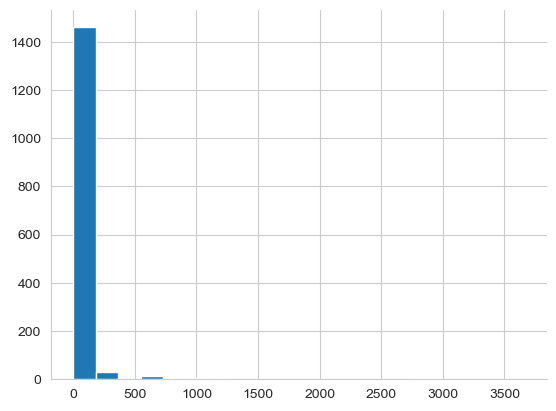

In [27]:
a_group.rev.hist(bins=20)
sns.despine()

Только оплатившие в группе А

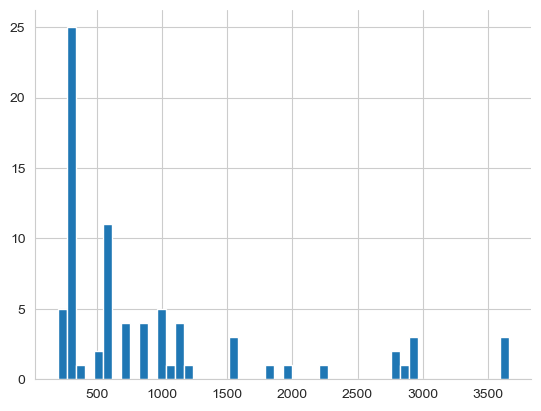

In [28]:
a_group_paid.rev.hist(bins=50)
sns.despine()

Распределение в группе B

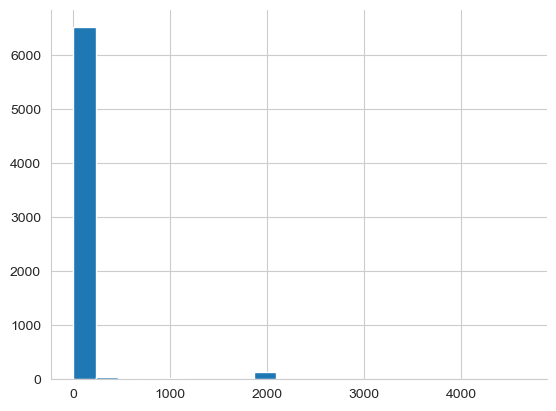

In [29]:
b_group.rev.hist(bins=20)
sns.despine()

Только оплатившие в группе B

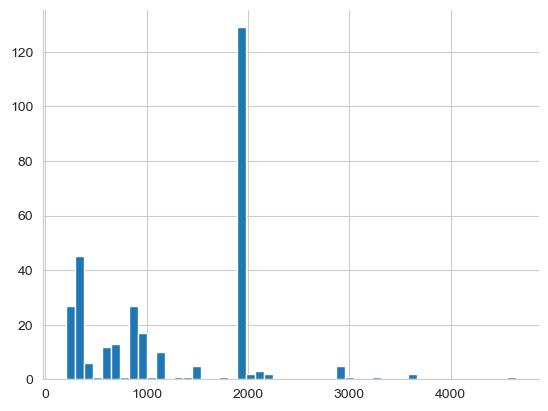

In [30]:
b_group_paid.rev.hist(bins=50)
sns.despine()

Сравним описательную статистику по всем пользователям в двух группах:

In [31]:
a_group_descr = a_group.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
b_group_descr = b_group.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа В,Группа А
count,1538.000000,6803.000000
mean,47.347204,58.058798
std,290.490632,313.770201
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3660.000000,4650.000000


Сравним описательную статистику по оплатившим пользователям в двух группах:

In [32]:
a_group_descr = a_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
b_group_descr = b_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа А,Группа В
count,78.000000,314.000000
mean,933.589744,1257.878992
std,919.932711,790.864254
min,199.000000,199.000000
25%,290.000000,511.750000
50%,585.000000,1140.000000
75%,1114.750000,1900.000000
max,3660.000000,4650.000000


Посмотрим на выбросы (все пользователи):

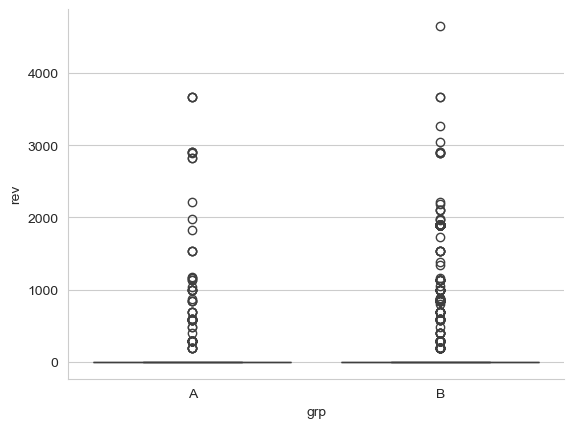

In [33]:
sns.boxplot(data=active_total, y='rev', x='grp')
sns.despine()

Посмотрим на выбросы (купившие):

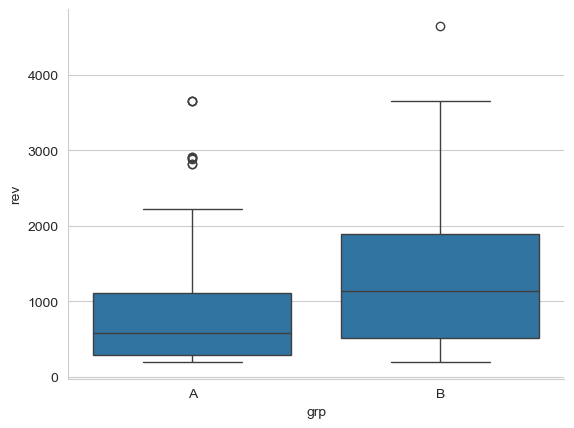

In [34]:
sns.boxplot(data=active_total_paid, y='rev', x='grp')
sns.despine()

Для оценки результатов следует выбрать следующие метрики:
* `CR` (конверсия онлайн платежей) - отношение количества оплативших клиентов к общему числу активных клиентов.
Может отражать юзабилити новой механики оплаты.
* `ARPU` - отношение общей прибыли к количеству активных пользователей.
Важный показатель для бизнеса, при увеличении этого показателя бизнес получает больше денег.
* `ARPPU` - отношение общей прибыли к количеству активных платящих пользователей.
Причины выбора этой метрики такие же, как и в случае с ARPU.

In [35]:
print('\033[1mCR \033[0m\nКонверсия оплативших пользователей:\nГруппа А:', 
                                             round(a_group_paid.id.count() / a_group.id.count(), 4),
                                             '\nГруппа В:', 
                                             round(b_group_paid.id.count() / b_group.id.count(), 4),
      '\nКонверсия у группы B на', abs(round((round(b_group_paid.id.count() / b_group.id.count(), 4) - 
                                   round(a_group_paid.id.count() / a_group.id.count(), 4)) / 
                                   round(a_group_paid.id.count() / a_group.id.count(), 4), 3) * 100), '%',
      'больше, чем у группы А' if round((round(b_group_paid.id.count() / b_group.id.count(), 4) - 
                                  round(a_group_paid.id.count() / a_group.id.count(), 4)) / 
                                  round(a_group_paid.id.count() / a_group.id.count(), 4), 3) * 100 > 0 
                               else 'меньше, чем у группы А')

print('\n\033[1mARPPU \033[0m\nотношение общей прибыли к количеству активных пользователей:\nГруппа А:',
                                                                                      round(a_group_paid.rev.mean(), 2), 
                                                                                     '\nГруппа В:', 
                                                                                      round(b_group_paid.rev.mean(), 2),
      '\nARPPU группы В на', round(round(b_group_paid.rev.mean() - a_group_paid.rev.mean(), 2) /
                             round(a_group_paid.rev.mean(), 2) * 100, 2),'%',
      'больше, чем у группы А' if round(round(b_group_paid.rev.mean() - a_group_paid.rev.mean(), 2) /
                                  round(a_group_paid.rev.mean(), 2) * 100, 2) > 0 
                               else 'меньше, чем у группы А/n')

print('\n\033[1mARPU\033[0m\nОтношение общей прибыли к количеству активных платящих пользователей:\nГруппа А:',
                                                                          round(a_group_paid.rev.sum() / a_group.id.count(), 2),
                                                                          '\nГруппа В:', 
                                                                          round(b_group_paid.rev.sum() / b_group.id.count(), 2),
      '\nARPU группы В на', 
      round((round(b_group_paid.rev.sum() / b_group.id.count(), 2) - round(a_group_paid.rev.sum() / a_group.id.count(), 2)) /
      round(a_group_paid.rev.sum() / a_group.id.count(), 2) * 100, 2), '%',
      'больше, чем у группы А' if 
      round((round(b_group_paid.rev.sum() / b_group.id.count(), 2) - round(a_group_paid.rev.sum() / a_group.id.count(), 2)) /
      round(a_group_paid.rev.sum() / a_group.id.count(), 2) * 100, 2) > 0
                               else 'меньше, чем у группы А')

CR 
Конверсия оплативших пользователей:
Группа А: 0.0507 
Группа В: 0.0462 
Конверсия у группы B на 8.9 % меньше, чем у группы А

ARPPU 
отношение общей прибыли к количеству активных пользователей:
Группа А: 933.59 
Группа В: 1257.88 
ARPPU группы В на 34.74 % больше, чем у группы А

ARPU
Отношение общей прибыли к количеству активных платящих пользователей:
Группа А: 47.35 
Группа В: 58.06 
ARPU группы В на 22.62 % больше, чем у группы А


### Имеются ли различия в показателях и с чем они могут быть связаны?
Наблюдается отрицательный эффект `CR`, и положительные эффекты в `ARPU` и `ARPPU`. Другими словами: конверсия падает, но доход на пользователя/покупателя растёт. Это может быть связано c отсечением части пользователей платящих малые суммы с одновременным увеличением среднего чека.

### Являются ли эти различия статистически значимыми?
Размеры групп очень сильно отличаются, поэтому классические тесты могут давать большие погрешности. В таком случае для оценки подойдет `bootstrap`.

* Строим `bootstrap` распределения для групп А и B.
* Вычислим их разницу.
* В получившемся рапределении разницы находим доверительных интервал.
* Проверяем, попадает ли доверительный интервал в 0. Если да, то нулевая гипотеза на данном уровне значимости принимается, если нет - отвергается.
------

Напишем функцию, которая позволит проверять гипотезы с помощью bootstrap:

In [36]:
# функция для проверки гипотез с помощью бутстрапа
def get_bootstrap(
    data_column_1,                       # числовые значения первой (контрольной) выборки
    data_column_2,                       # числовые значения второй (тестовой) выборки
    boot_it   = 1000,                    # количество бутстрэп-подвыборок
    statistic = np.mean,                 # интересующая нас статистика
    bootstrap_conf_level = 0.95,         # уровень значимости
    graph         = True,                # отрисовывать ли график
    show_progress = True                 # показывать ли индикатор програсса
    ):
    boot_len  = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    
    # выбираем отрисовывать индикатора прогресса или нет
    if show_progress:
        progress_bar = tqdm
    else:
        progress_bar = lambda x: x
    
    for i in progress_bar(range(boot_it)):        # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True                        # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_delta = samples_2 - samples_1      # находим разницу подвыборок
        boot_data.append(statistic(samples_delta)) # применяем статистику для разниц подвыборок
        
    pd_boot_data = pd.DataFrame(boot_data)

    # доверительный интервал 
    left_quant  = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x     = 0, 
        loc   = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x     = 0, 
        loc   = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # отисовка графиков
    if graph == True:
        plt.hist(pd_boot_data[0], bins = 50)
        plt.style.use('ggplot')
        plt.vlines(ci, ymin=0, ymax=50, linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
       
    return {"ci": ci, 
            "p_value": p_value}

Определим функции для метрик

In [37]:
def cr_func(x):
    '''
    CR
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию со значениями 1 и 0, или True и False,
    в соответствие с тем произошло ожидаемое событие или нет.
    '''
    return sum(x) / len(x)

def arpu_func(y):
    '''
    ARPU
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию, где все NaN-значения заменнены на нули
    '''
    return np.mean(y)

def arppu_func(y):
    '''
    ARPPU
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию, где отобраны только платежи, т.е. отфильтрованы нули
    или вместо нулей стоят NaN.
    '''
    return np.mean(y)

### CR

Сформулируем нулевую и альтернативную гипотезы:

* `H0`: CR в двух группах одинаковые.
* `H1`: CR в двух группах различаются.

  0%|          | 0/1000 [00:00<?, ?it/s]

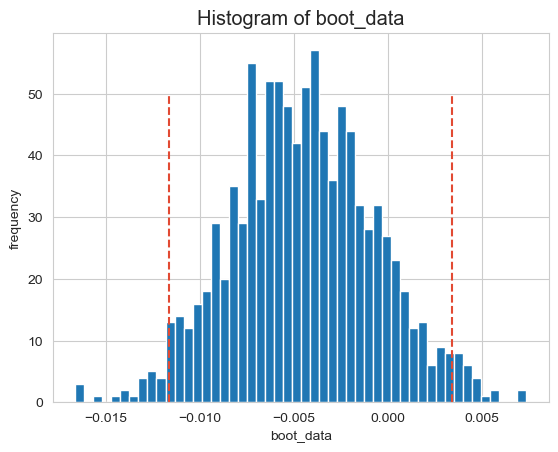

{'ci':               0
 0.025 -0.011613
 0.975  0.003381,
 'p_value': 0.2393312529770073}

In [38]:
get_bootstrap(a_group.payment, b_group.payment, statistic = cr_func)

Доверительный интервал **попадает в 0**, недостаточно оснований отвергнуть нулевую гипотезу. Нельзя утверждать, что различия CR в двух группах есть.

### ARPU
Сформулируем нулевую и альтернативную гипотезы:

* `H0`: ARPU в двух группах одинаковые.
* `H1`: ARPU в двух группах различаются.

  0%|          | 0/1000 [00:00<?, ?it/s]

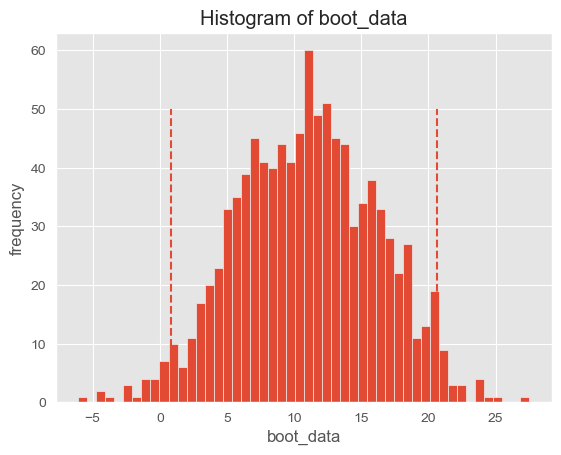

{'ci':                0
 0.025   0.872851
 0.975  20.659338,
 'p_value': 0.03536296429609685}

In [39]:
get_bootstrap(a_group.rev, b_group.rev, statistic = arpu_func)

Доверительный интервал **не попадает в 0**, отвергаем нулевую гипотезу. ARPU в двух группах различаются.

### ARPPU
Сформулируем нулевую и альтернативную гипотезы:

* `H0`: ARPPU в двух группах одинаковые.
* `H1`: ARPPU в двух группах различаются.

  0%|          | 0/1000 [00:00<?, ?it/s]

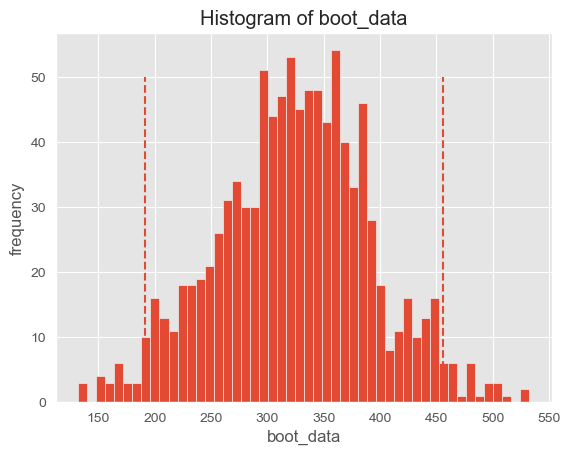

{'ci':                 0
 0.025  191.132018
 0.975  455.486554,
 'p_value': 1.9459846474962635e-06}

In [40]:
get_bootstrap(a_group.rev[a_group.rev > 0], b_group.rev[b_group.rev > 0], statistic = arppu_func)

Доверительный интервал **не попадает в 0**, отвергаем нулевую гипотезу. ARPPU в двух группах различаются.

## Стоит ли запускать новую механику на всех пользователей?
Да, новая механика оплаты даёт статистически значимый прирост в метриках ARPU и ARPPU, отрицательное изменение метрики CR не подтвердилось.